In [25]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [130]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [131]:
cwd = Path().absolute()
cwd

PosixPath('/Users/dvidyasagar/Coding/ML/kkn_practice')

In [132]:
parent = cwd.parent
data_folder = parent.joinpath('data/magic_gamma_telescope')
data_path = str(data_folder.joinpath('magic04.data'))
names_path = str(data_folder.joinpath('magic04.names'))
print(data_path, names_path)

/Users/dvidyasagar/Coding/ML/data/magic_gamma_telescope/magic04.data /Users/dvidyasagar/Coding/ML/data/magic_gamma_telescope/magic04.names


In [133]:
df = pd.read_csv(data_path)
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [134]:
#it doesn't have columns names. so lets give the names to our columns.

In [135]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(data_path, names=cols)

In [136]:
df.head()

,fLength,fWidth,fSize,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [137]:
# now we have the names.
# one thing that we notice is class is g and h

In [138]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [139]:
# so we will convert this g-->1 and h-->0
df['class'] = (df['class']=='g').astype(int)

In [140]:
df.head()

,fLength,fWidth,fSize,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [141]:
df['class'].unique()

array([1, 0])

In [142]:
df.shape

(19020, 10)

In [143]:
# before we dice in lets understand what is this data is about.

**Overview**:

    Origin and Collection:
        The data was originally owned by the MAGIC (Major Atmospheric Gamma Imaging Cherenkov Telescope) project.
        The dataset is generated using a Monte Carlo simulation, specifically the Corsika program.

    Purpose of Data Collection:
        The primary aim of the MAGIC gamma telescope is to observe high-energy gamma rays.
        The telescope observes the radiation emitted by charged particles produced inside the electromagnetic showers  initiated by the gamma rays.
        By capturing this Cherenkov radiation, the telescope can reconstruct the parameters of the shower.

    Nature of the Data:
        The data simulates the registration of these gamma particles.
        The observations are patterns formed by the Cherenkov photons on photomultiplier tubes. These patterns are termed as 'shower images'.
        The images can help discriminate between primary gamma-induced showers (signal) and background noise caused by cosmic rays in the atmosphere.

In [144]:
# g--> gamma (signal)
# h--> hadron (background) --> background noise caused by cosmic rays in the atmosphere.

In [145]:
# Importance:
# The ability to observe high-energy gamma rays provides insights into astrophysical phenomena, 
# such as supermassive black holes, neutron stars, and supernovae.

Let's break down the attributes (columns) provided in the dataset:

1. **fLength:** This refers to the major axis of the ellipse. In the context of the data, the "shower image" of the detected gamma ray can often be represented as an elongated cluster that resembles an ellipse. The major axis is the longest diameter of that ellipse. It's measured in millimeters (mm).

2. **fWidth:** This is the minor axis of the ellipse. It's the shortest diameter of the ellipse formed by the shower image. Also measured in millimeters (mm).

3. **fSize:** This is a logarithmic representation (base 10) of the sum of the content of all pixels in the image. It gives an idea about the overall brightness or intensity of the detected image. The term "content of all pixels" here refers to the amount of Cherenkov photons detected in all the pixels of the camera.

4. **fConc:** This is a ratio that represents the sum of the two highest pixel values (i.e., the two brightest spots in the image) over the total brightness (fSize). It gives an idea of the concentration of the light in the image. If the value is high, it means most of the light is concentrated in those two pixels.

5. **fConc1:** This is the ratio of the highest pixel value over the total brightness (fSize). It provides insight into how much of the image's intensity is concentrated in its brightest spot.

6. **fAsym:** This is the distance from the highest pixel (brightest spot) to the center of the image, projected onto the major axis. It provides a measure of the image's asymmetry. If the brightest spot is in the center, the value would be low. If it's towards one end of the major axis, the value would be higher. This distance is also measured in millimeters (mm).

7. **fM3Long:** This refers to the third root of the third moment along the major axis. In statistics, moments are measures that describe the shape of a distribution. Here, the third moment along the major axis is likely describing some aspect of the distribution of light along the elongated shape of the shower image. The third root is taken to scale the value to be more interpretable.

In simpler terms, these attributes are capturing the shape, brightness, and distribution of the detected light when the gamma rays strike the telescope. They are crucial for analyzing and differentiating between the gamma ray-induced showers and other background noises or events.

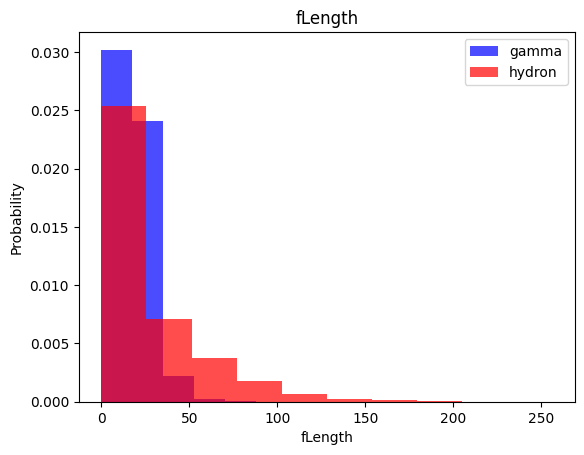

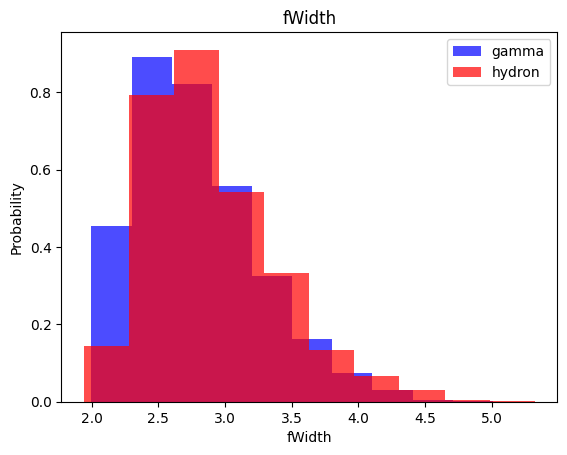

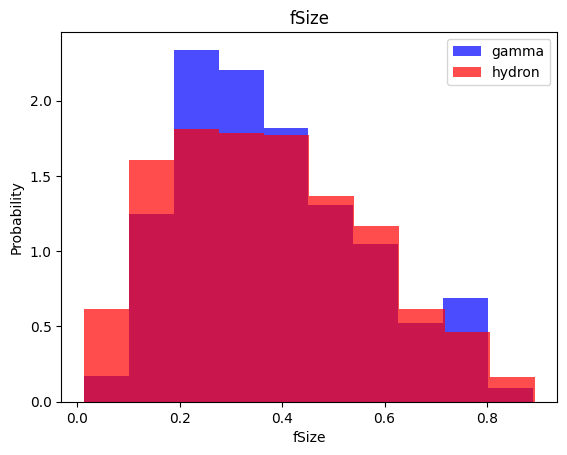

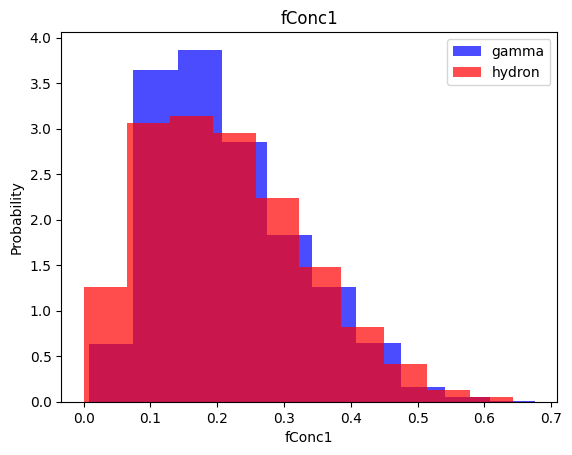

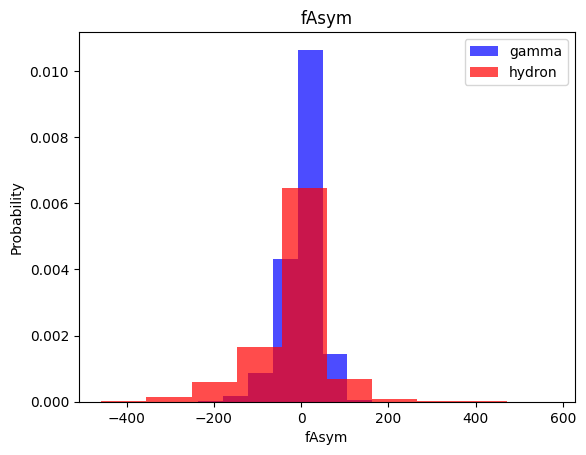

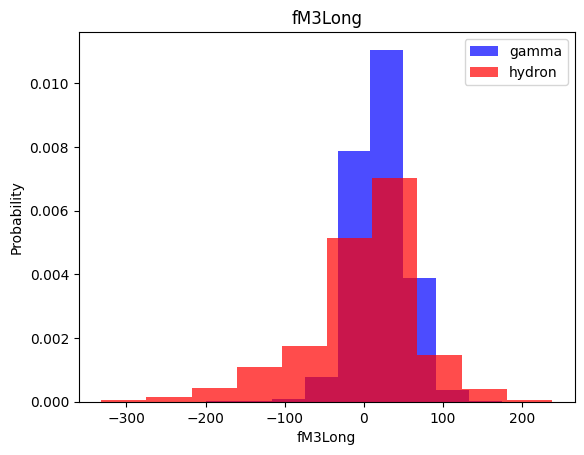

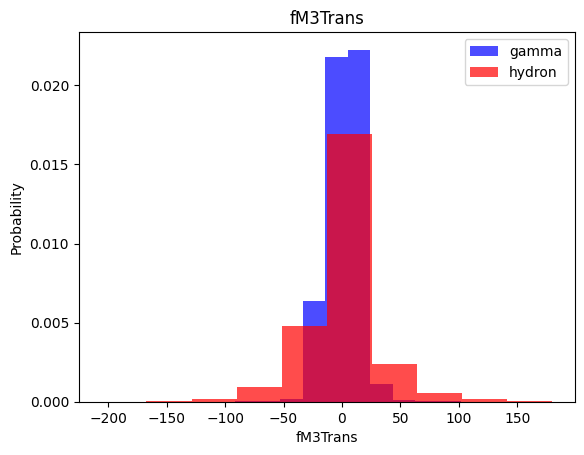

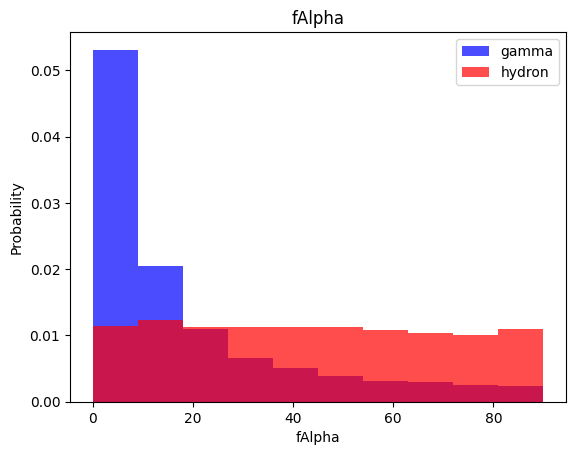

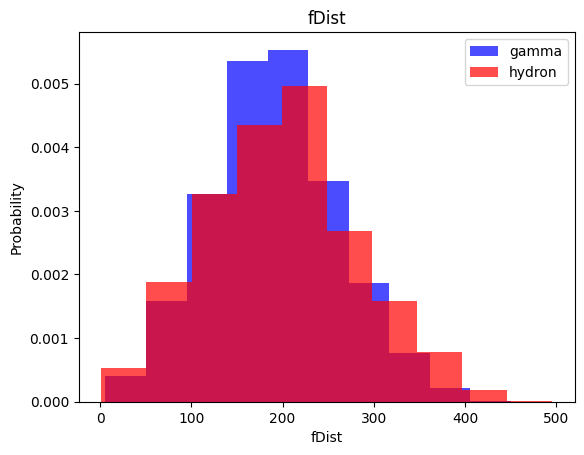

In [146]:
#lets see all the columns thata represent the gamma signals
for column in cols[:-1]:
    plt.hist(df[df['class']==1][column], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][column], color='red', label='hydron', alpha=0.7, density=True)
    plt.title(column)
    plt.ylabel('Probability')
    plt.xlabel(column)
    plt.legend()
    plt.show()

In [147]:
# fAlpha --> for this the hydrons are evenly distributed, where as for most gamma values it is really smaller.

In [148]:
# Lets create train, validation, test

# Trian, Validation, and Test

In [203]:
df_shuffled = df.sample(frac=1)
first, second = [int(0.6*len(df)), int(0.8*len(df))]
train = df_shuffled.iloc[:first]
valid = df_shuffled.iloc[first:second]
test = df_shuffled.iloc[second:]

In [204]:
print(train.shape, valid.shape, test.shape, type(train), type(valid), type(test))

(11412, 10) (3804, 10) (3804, 10) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [205]:
# we have a another issue with scaling the columns, some columns are not in same scale as another columns.
# so lets standardize the scale for each columns.

In [206]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data , X, y

In [207]:
train.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',
       'fAlpha', 'fDist', 'class'],
      dtype='object')

In [208]:
# we have created our scaler function.
# we have another issue to deal with class imbalence.
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hydron

7335
4077


In [209]:
# see we have more gammas than hydrons.
# because of this our model will be really good at predicting gammas and bad at hydrons :(
# so, How to fix this, we have to increase the number of hydrons -> oversample.
# we will import RandomOverSampler from imblearn.over_sampling

In [210]:
train, X_train, y_train = scale_dataset(train, oversample=True)
print(len(train[train[:,-1]==1])) # gamma
print(len(train[train[:,-1]==0])) # hydron

7335
7335


In [211]:
# see the class is perfectly balence now.

In [212]:
len(y_train)

14670

In [213]:
sum(y_train==1)

7335

In [214]:
sum(y_train==0)

7335

In [215]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**Model**
Lets discuss about the model:-
as you see the data we have is direcly pointing us to a classification problem, as the target is limited category values.
well if it is a regression the target is infinite possible values, which is not a classification problem(Mostly).

Lets get back to classification problems. for this problem we will go with k-Nearest-Neighbours Algorithm.

The K-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used for both classification and regression tasks. It is based on the idea that similar data points tend to have similar labels.

To classify a new data point using KNN, the algorithm first finds the K most similar data points in the training set, using a distance metric such as Euclidean distance. The algorithm then assigns the new data point to the class that is most common among the K nearest neighbors.

KNN can also be used for regression tasks by finding the average of the K nearest neighbors' output values.

KNN is a non-parametric algorithm, which means that it does not make any assumptions about the underlying distribution of the data. This makes KNN a versatile algorithm that can be used for a wide variety of problems.

Here is an example of how KNN can be used for classification:

Suppose we have a dataset of images of cats and dogs, and we want to train a model to classify new images as either cats or dogs. We can use KNN to do this by first training the model on a set of labeled images. When we want to classify a new image, the model will find the K most similar images in the training set and assign the new image to the class that is most common among the K nearest neighbors.

One of the advantages of KNN is that it is very simple to implement and understand. However, KNN can also be computationally expensive, especially for large datasets. Additionally, KNN can be sensitive to the choice of distance metric and the value of K.

Here are some of the pros and cons of the KNN algorithm:

**Pros:**

* Simple to implement and understand
* Versatile and can be used for both classification and regression tasks
* Non-parametric and does not make any assumptions about the underlying distribution of the data

**Cons:**

* Computationally expensive for large datasets
* Sensitive to the choice of distance metric and the value of K

Overall, KNN is a powerful and versatile machine learning algorithm that can be used for a wide variety of problems. However, it is important to be aware of the algorithm's limitations, such as its computational complexity and sensitivity to the choice of distance metric and K.

In [216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [223]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [224]:
y_predict = knn.predict(X_test)

In [225]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1300
           1       0.86      0.86      0.86      2504

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804

